## Breast Cancer Prediction Model Report

## Importing the necessary Library

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Importing the dataset

In [32]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. About the Data
The dataset contains cellular features of breast cancer tumors, including metrics like radius, texture, perimeter, smoothness, and more. The target variable, diagnosis, is binary: 0 for benign tumors and 1 for malignant tumors. The dataset consists of 569 instances and 30 features, such as:

* Mean metrics: Radius, texture, perimeter, area, smoothness, etc.
* Standard error metrics: Radius, texture, perimeter, area, etc.
* Worst metrics: Radius, texture, perimeter, area, etc.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 2. Objective
The goal of this analysis is to develop a predictive model for classifying breast tumors as benign or malignant. The predictive model aims to aid in early diagnosis, potentially improving patient outcomes through timely treatment.

## Data Exploration and Feature Engineering
The dataset has no missing values. The id column was dropped, and the target variable was encoded as binary (0 for benign, 1 for malignant). StandardScaler was used for scaling the features, as models like Logistic Regression and SVM are sensitive to unscaled data. The dataset was split into training and test sets with a 70/30 ratio, and SMOTE was applied to handle class imbalance.

In [3]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [34]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
class_distribution = df['diagnosis'].value_counts()
class_distribution 

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [35]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [36]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [37]:
smote_under = SMOTE(random_state=42)
X_train_smote_under, y_train_smote_under = smote_under.fit_resample(X_train_under, y_train_under)


In [12]:
class_weight = 'balanced'

## 3. Model Training

## Classifier Models
Four different classifier models were trained for comparison:

* Logistic Regression,
* Random Forest,
* Support Vector Machine (SVM),
* XGBoost

## Hyperparameter Tuning
Grid search with cross-validation was used to find the best hyperparameters for each model:

* Logistic Regression: Tuned over the C parameter (0.01 to 100).
* Random Forest: Tuned over the number of trees (n_estimators) and maximum depth (max_depth).
* SVM: Tuned over C and kernel (linear and RBF).
* XGBoost: Tuned over n_estimators, learning_rate, and max_depth.

In [13]:
def cross_validate_and_tune(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'Best Parameters: {grid_search.best_params_}')
    return grid_search.best_estimator_

In [17]:
log_reg = LogisticRegression(max_iter=1000,class_weight=class_weight)
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100]}


best_log_reg = cross_validate_and_tune(log_reg, param_grid_log_reg, X_train, y_train)

Best Parameters: {'C': 10}


In [15]:
rf_model = RandomForestClassifier(class_weight=class_weight)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
best_rf = cross_validate_and_tune(rf_model, param_grid_rf, X_train, y_train)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [22]:
svm_model = SVC(probability=True, max_iter=5000, tol=1e-6, class_weight=class_weight)
param_grid_svm = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
best_svm = cross_validate_and_tune(svm_model, param_grid_svm, X_train, y_train)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [23]:
xgb_model = XGBClassifier(eval_metric='logloss')
param_grid_xgb = {'n_estimators': [50, 100, 200], 
                  'learning_rate': [0.01, 0.1, 0.2], 
                  'max_depth': [3, 6, 9]}


best_xgb = cross_validate_and_tune(xgb_model, param_grid_xgb, X_train, y_train)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


## Confusion matrix visualization

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [25]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'Confusion Matrix - {title}')
    plt.show()


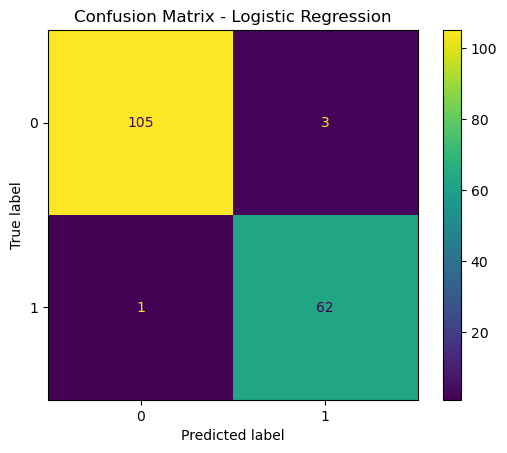

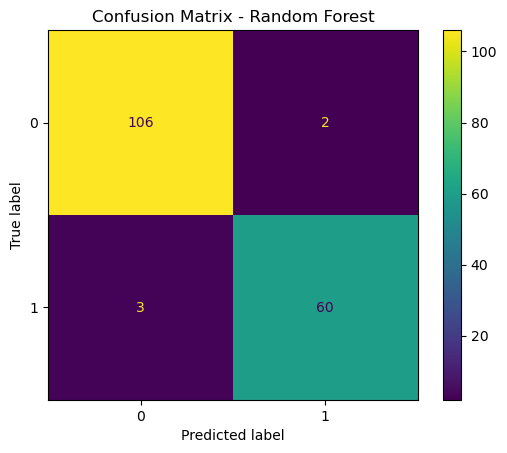

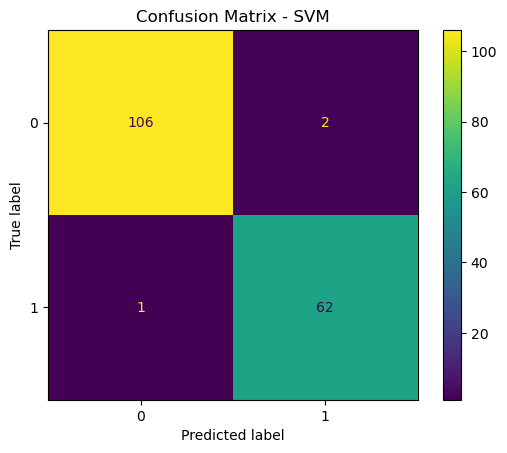

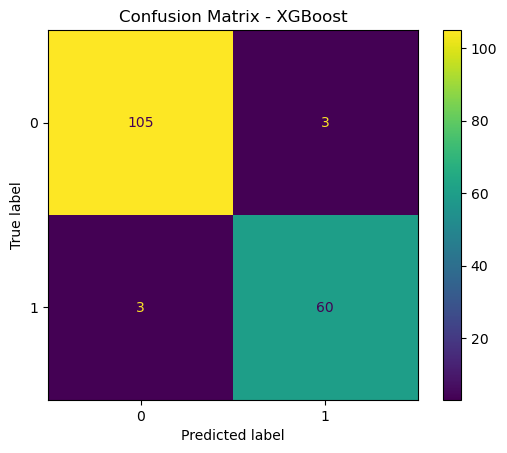

In [26]:
plot_confusion_matrix(best_log_reg, X_test, y_test, "Logistic Regression")
plot_confusion_matrix(best_rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(best_svm, X_test, y_test, "SVM")
plot_confusion_matrix(best_xgb, X_test, y_test, "XGBoost")

# Model Evaluation
The performance of each model was assessed using Accuracy,Precision, Recall, F1-Score

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, precision, recall, f1

In [28]:
log_reg_metrics = evaluate_model(best_log_reg, X_test, y_test)
rf_metrics = evaluate_model(best_rf, X_test, y_test)
svm_metrics = evaluate_model(best_svm, X_test, y_test)
xgb_metrics = evaluate_model(best_xgb, X_test, y_test)

In [29]:
metrics_dict = {
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rf_metrics,
    'SVM': svm_metrics,
    'XGBoost': xgb_metrics
}


metrics_df = pd.DataFrame(metrics_dict, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])


metrics_df_transposed = metrics_df.T

In [30]:
print(metrics_df_transposed)

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.976608   0.953846  0.984127  0.968750
Random Forest        0.970760   0.967742  0.952381  0.960000
SVM                  0.982456   0.968750  0.984127  0.976378
XGBoost              0.964912   0.952381  0.952381  0.952381


## Recommended Classifier Model
Based on the evaluation, Support Vector Machine (SVM) was the best-performing model in terms of accuracy (0.9825) and F1-Score (0.9764). Despite its complexity, SVM provides the most accurate classification and is recommended for its ability to handle high-dimensional data and produce reliable results. For use in a clinical setting where both high precision and recall are critical, SVM provides the best trade-off between performance and explainability.

## Feature Importance
Feature importance was analyzed using Random Forest and XGBoost, while logistic regression coefficients were examined.

In [39]:
def plot_feature_coefficients(model, X, title):
    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
        feature_names = X.columns
        indices = np.argsort(coef)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Coefficients - {title}')
        plt.bar(range(X.shape[1]), coef[indices], align='center')
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()
    else:
        print(f'{title} does not support feature coefficients.')

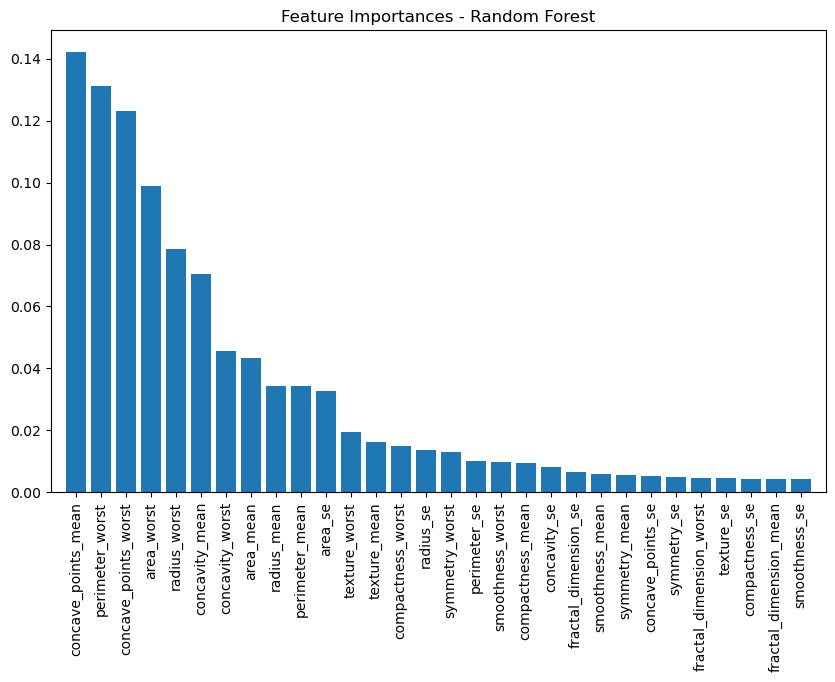

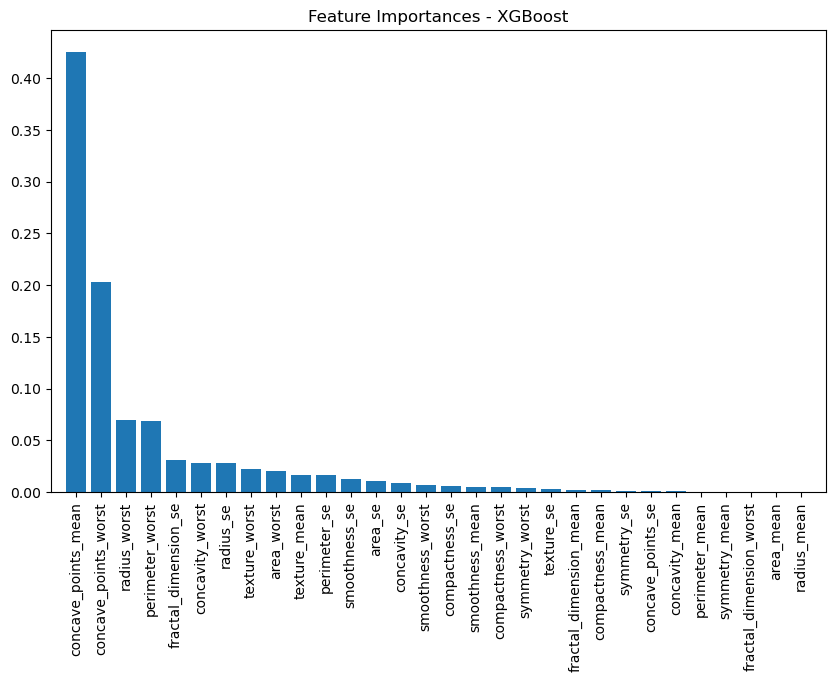

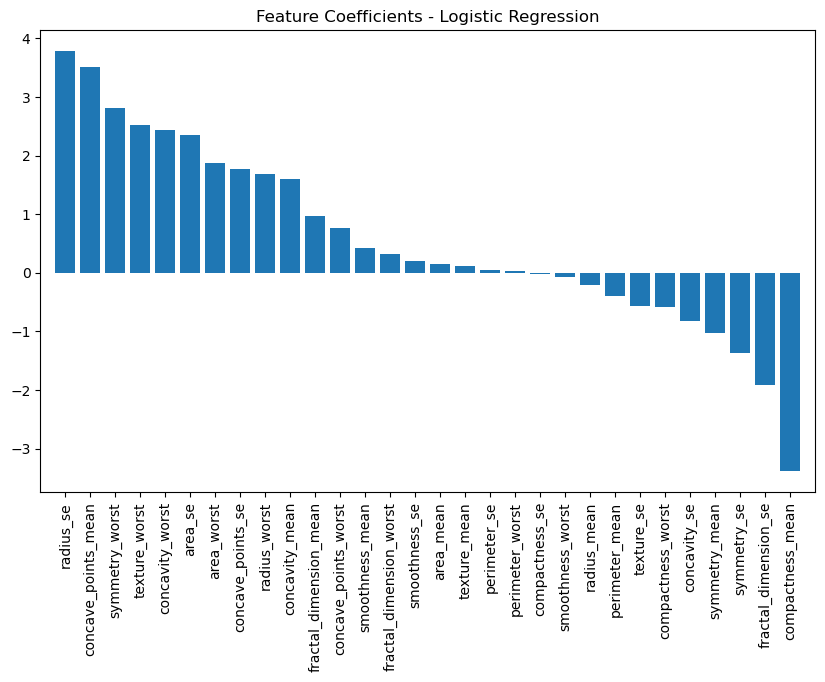

In [42]:
plot_feature_importance(best_rf, pd.DataFrame(X_scaled, columns=X.columns), 'Random Forest')
plot_feature_importance(best_xgb, pd.DataFrame(X_scaled, columns=X.columns), 'XGBoost')

# Feature coefficients for Logistic Regression (make sure the model supports this)
plot_feature_coefficients(best_log_reg, pd.DataFrame(X_scaled, columns=X.columns), 'Logistic Regression')

## Key Findings and Insights
Across all models, concave point mean consistently showed up as a very important feature. This means it's a crucial factor in determining whether a tumor is malignant. The fact that it stands out in Random Forest, XGBoost, and Logistic Regression highlights its significance. Therefore, focusing on the concave point mean in medical evaluations can improve the accuracy of diagnoses and help in making better treatment decisions.

## Suggestions for Next Steps
* Collect more data: Although the models performed well, adding more data would further improve model robustness, particularly in real-world settings with diverse populations.
* Incorporate additional features: Features such as patient demographics, genetic markers, or lifestyle factors could enhance the model’s predictive power.
* Fine-tuning models: Further fine-tuning of hyperparameters, especially for SVM and XGBoost, might lead to even better performance.
